# Automated Speech Recognition (ASR)


## Applications:

1. Voice activity detection
2. Speech enhancement
3. Speech recognition
4. Text to speech
5. Speaker diarization and speaker recognition
6. Audio source separation
7. Speech modification
8. Emotional speech classification
9. Keyword spotting


## DataSet

1. [TIMIT](https://github.com/philipperemy/timit)
2. [AURORA-2](http://aurora.hsnr.de/aurora-2.html)


- Sound is transmitted as waves.
- Sound waves are one-dimensional.
- At every moment in time, they have a single value based on the height of the wave.
- Speech signal can be segmented into a sequence of phonemes and silence/ non-speech segments. \
  **Text:** “will we ever forget it” \
  **Phonetic sequence:** ‘w’, ‘ih’, ‘l’, ‘w’, ‘iy’, ‘eh’, ‘v’, ‘er’, ‘f’, ‘er’, ‘g’, ‘eh’, ‘t’, ‘ih’, ‘t’
- Speech can be represented as a variation of amplitude with time.


## Sampling
**Q:** How do we turn sound waves into numbers?
**A:** To turn this sound wave into numbers, we just record of the height of the wave at equally-spaced points. This is called sampling.


We are taking a reading thousands of times a second and recording a number representing the height of the sound wave at that point in time. That’s basically all an uncompressed .wav audio file is.

“CD Quality” audio is sampled at 44.1khz (44,100 readings per second). But for speech recognition, a sampling rate of 16khz (16,000 samples per second) is enough to cover the frequency range of human speech.


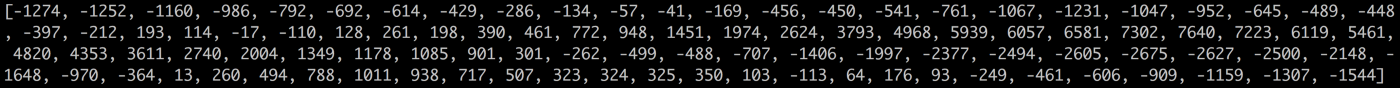


**Example:** sample a “Hello” sound wave 16,000 times per second. \
Each number represents the amplitude of the sound wave at 1/16000th of a second intervals


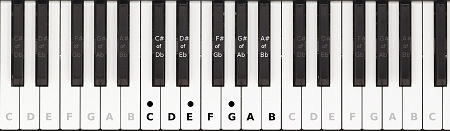


Imagine you had a recording of someone playing a C Major chord on a piano. That sound is the combination of three musical notes— C, E and G — all mixed together into one complex sound. We want to break apart that complex sound into the individual notes to discover that they were C, E and G. We do this using a mathematic operation called a **Fourier Transform**. It breaks apart the complex sound wave into the simple sound waves that make it up. Once we have those individual sound waves, we add up how much energy is contained in each one.

[Short-time Fourier transform (STFT)](https://en.wikipedia.org/wiki/Short-time_Fourier_transform)

Each number in the list represents how much energy was in that 50hz frequency band


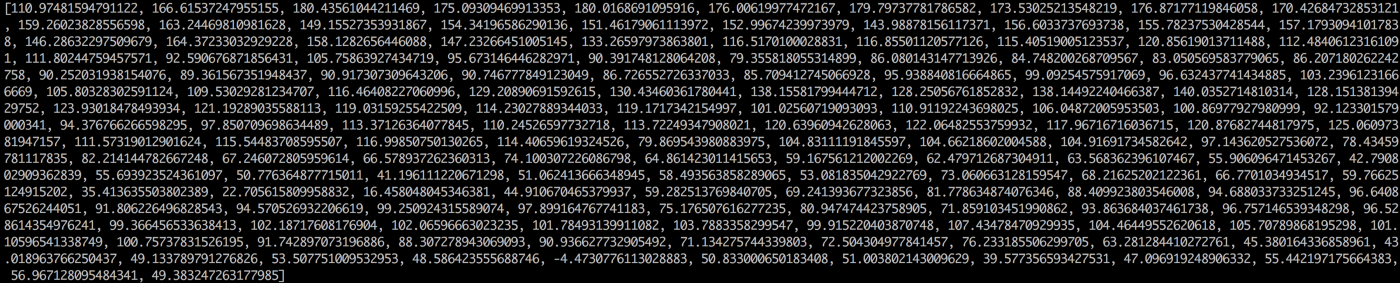


You can see that our 20 millisecond sound snippet has a lot of low-frequency energy and not much energy in the higher frequencies. That’s typical of “male” voices.


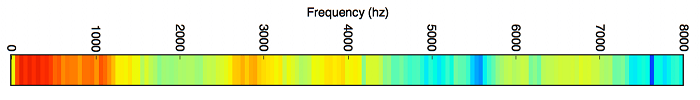


The full spectrogram of the “hello” sound clip


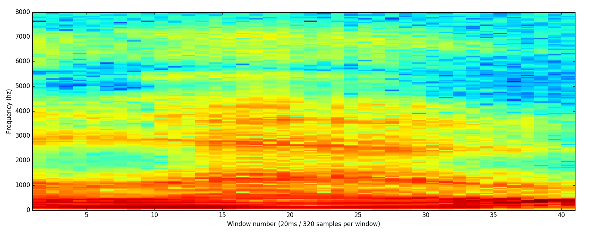


## Noise in speech and text:
Noise is any unwanted signal distorting the original signal. Adding noise to speech vs adding noise to text is very different.

Given a speech signal with amplitude s[n], where n is the sample index, noise is any other signal, w[n] which interferes with the speech. The noisy speech signal u[n] can be seen as:

u[n]=s[n] + w[n]


In [ ]:
!pip install pydub

In [18]:
from pydub import AudioSegment


def ogg2wav(ofn):
  wfn = ofn.replace('.ogg', '.wav')
  x = AudioSegment.from_file(ofn)
  x.export(wfn, format='wav')

In [17]:
!gdown --id 1yuIpRiLgssYlpUXnZexxK9gnMvoYCoHr
!gdown --id 1MRAI03dF1a-d6EjeoLAxE18zjnolHGWZ

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1yuIpRiLgssYlpUXnZexxK9gnMvoYCoHr
To: /content/Salam.ogg
100% 10.3k/10.3k [00:00<00:00, 14.0MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1MRAI03dF1a-d6EjeoLAxE18zjnolHGWZ
To: /content/khodahafez.ogg
100% 12.2k/12.2k [00:00<00:00, 17.4MB/s]


In [19]:
salam = ogg2wav('Salam.ogg')
Khodafez = ogg2wav('khodahafez.ogg')

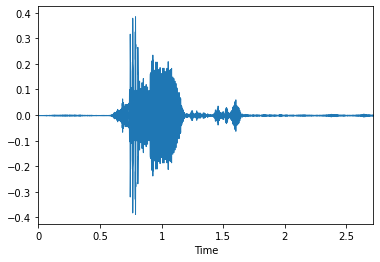

In [29]:
import librosa
import librosa.display

salam_wav01, sr01 = librosa.load('Salam.wav')
librosa.display.waveplot(salam_wav01, sr=sr01)

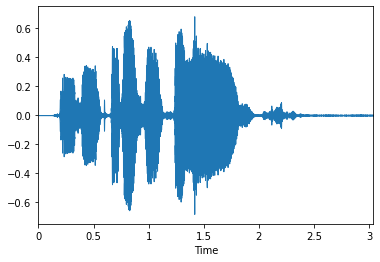

In [21]:
Khodafez, sr02 = librosa.load('khodahafez.wav')
librosa.display.waveplot(Khodafez, sr=sr02)

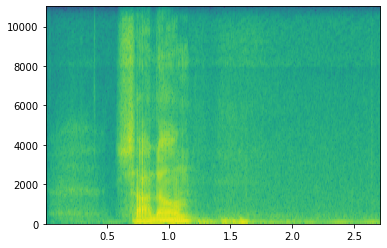

In [22]:
import matplotlib.pyplot as plt

powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(salam_wav01,
                                                                Fs=sr01)
plt.show()

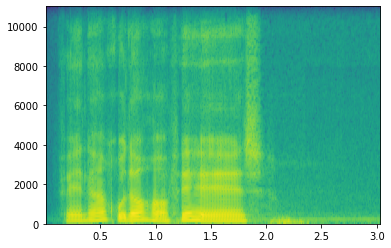

In [23]:
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(Khodafez,
                                                                Fs=sr02)
plt.show()

In [28]:
print(len(salam_wav01) / sr01)

2.72


In [30]:
print(len(Khodafez) / sr02)

3.04


## Ref:
[Machine Learning is Fun Part 6: How to do Speech Recognition with Deep Learning
](https://medium.com/@ageitgey/machine-learning-is-fun-part-6-how-to-do-speech-recognition-with-deep-learning-28293c162f7a)

[Beginner’s guide to Speech Analysis](https://towardsdatascience.com/beginners-guide-to-speech-analysis-4690ca7a7c05)
